In [ ]:
#python -m ipykernel install --user --name ex --display-name "Python (ex)"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_convergence = pd.read_csv('ResMILBs64_2/convergence.csv')

In [4]:
df_convergence.head()

,epoch,metric,value
0,1,loss,0.632376
1,2,loss,0.622016
2,3,loss,0.618730
3,4,loss,0.616297
4,5,loss,0.614875


In [5]:
df_loss = df_convergence[df_convergence['metric'] == 'loss' ]

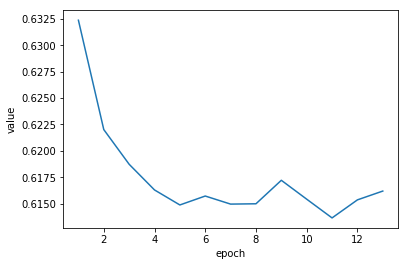

In [6]:
sns.lineplot(x=df_loss['epoch'], y=df_loss['value'], hue=None, size=None, style=None, data=df_loss)

In [7]:
df_error = df_convergence[df_convergence['metric'] == 'error' ]

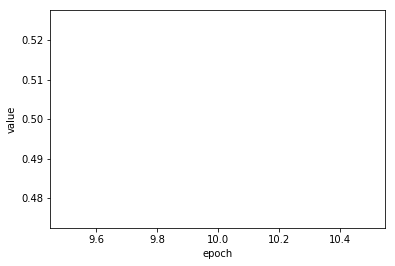

In [8]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [9]:
df_error = df_convergence[df_convergence['metric'] == 'fpr' ]

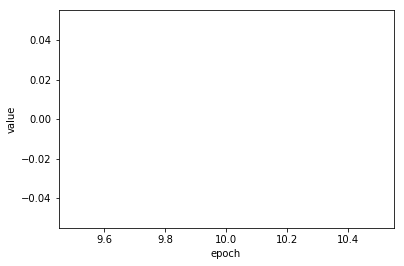

In [10]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [11]:
df_error = df_convergence[df_convergence['metric'] == 'fnr' ]

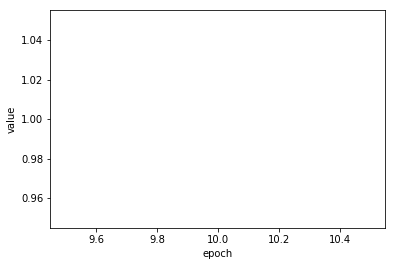

In [12]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [13]:
df_FPR_FNR = df_convergence[(df_convergence['metric'] == 'fpr') | (df_convergence['metric'] == 'fnr') ]

In [14]:
df_FPR_FNR.head()

,epoch,metric,value
11,10,fpr,0.0
12,10,fnr,1.0


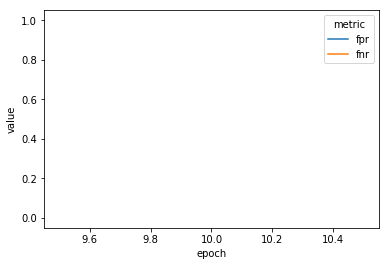

In [15]:
sns.lineplot(x=df_FPR_FNR['epoch'], y=df_FPR_FNR['value'], hue='metric', size=None, style=None, data=df_FPR_FNR)

In [14]:
### Show prediction 

In [16]:
df_proba_sample = pd.read_csv('ResMILBs64_2/probability.csv')

In [17]:
df_proba_sample[df_proba_sample.index == 'TNE0075'].shape

(311, 3)

In [18]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_atypical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = False)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [19]:
dict_sample_tiles_scores_ATYPICAL  = tiles_highest_atypical_scores(df_proba_sample)

SAMPLE   TNE0985
SAMPLE   TNE0519
SAMPLE   TNE1422
SAMPLE   TNE0287
SAMPLE   TNE1099
SAMPLE   TNE1411
SAMPLE   TNE0286
SAMPLE   TNE1086
SAMPLE   TNE2142
SAMPLE   TNE1017
SAMPLE   TNE2141
SAMPLE   TNE1430
SAMPLE   TNE1456
SAMPLE   TNE1414
SAMPLE   TNE0974
SAMPLE   TNE1410
SAMPLE   TNE1095
SAMPLE   TNE0522
SAMPLE   TNE1080
SAMPLE   TNE1024
SAMPLE   TNE0288
SAMPLE   TNE1450
SAMPLE   TNE0520
SAMPLE   TNE0944
SAMPLE   TNE0952
SAMPLE   TNE0075
SAMPLE   TNE1365
SAMPLE   TNE1413
SAMPLE   TNE0408
SAMPLE   TNE0521
SAMPLE   TNE0002
SAMPLE   TNE0289
SAMPLE   TNE0810
SAMPLE   TNE1338


In [20]:
dict_sample_tiles_scores_ATYPICAL

{'TNE0985': [{'TopTiles': TNE0985    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0985    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0985    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0985    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0985    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE0985    0.344595
   TNE0985    0.343762
   TNE0985    0.342408
   TNE0985    0.340829
   TNE0985    0.338075
   Name: probability, dtype: float64},
  {'Targets': 0}],
 'TNE0519': [{'TopTiles': TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE0519    0.344595
   TNE0519    0.343762
   TN

In [21]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_typical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = True)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [22]:
dict_sample_tiles_scores_TYPICAL  = tiles_highest_typical_scores(df_proba_sample)

SAMPLE   TNE0985
SAMPLE   TNE0519
SAMPLE   TNE1422
SAMPLE   TNE0287
SAMPLE   TNE1099
SAMPLE   TNE1411
SAMPLE   TNE0286
SAMPLE   TNE1086
SAMPLE   TNE2142
SAMPLE   TNE1017
SAMPLE   TNE2141
SAMPLE   TNE1430
SAMPLE   TNE1456
SAMPLE   TNE1414
SAMPLE   TNE0974
SAMPLE   TNE1410
SAMPLE   TNE1095
SAMPLE   TNE0522
SAMPLE   TNE1080
SAMPLE   TNE1024
SAMPLE   TNE0288
SAMPLE   TNE1450
SAMPLE   TNE0520
SAMPLE   TNE0944
SAMPLE   TNE0952
SAMPLE   TNE0075
SAMPLE   TNE1365
SAMPLE   TNE1413
SAMPLE   TNE0408
SAMPLE   TNE0521
SAMPLE   TNE0002
SAMPLE   TNE0289
SAMPLE   TNE0810
SAMPLE   TNE1338


In [22]:
dict_sample_tiles_scores_TYPICAL

{'TNE1430': [{'TopTiles': TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE1430    0.222708
   TNE1430    0.227228
   TNE1430    0.229838
   TNE1430    0.232375
   TNE1430    0.235380
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'TNE2142': [{'TopTiles': TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE2142    0.222708
   TNE2142    0.227228
   TN

In [23]:
import os
import shutil
def move_best__tiles(dict_sample_tiles_scores, outputdir, best_atypical = True):
    try:
        os.mkdir(outputdir)
    except:
        print('Outputdir already created ')
    for sample in dict_sample_tiles_scores.keys():
        sample_info = dict_sample_tiles_scores[sample]
        target_sample =  sample_info[2]['Targets']
        try:
            os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample)))
        except:
            print('sample folder already created ')
        
        
        if best_atypical:
            histo_type = 'Atypical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
        else:
            histo_type = 'Typical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
            
        tiles = sample_info[0]['TopTiles']
        probs = sample_info[1]['TopScores']
        for tile, prob in zip(tiles, probs):
            tile_names = tile.split('/')[-1].split('.')[0]
            outputname = tile_names + '__' + str(round(prob*100)) + '.'+ tile.split('/')[-1].split('.')[1]
            print(outputname)
            shutil.copy(tile, os.path.join(outputdir ,sample + '_'+ str(target_sample), histo_type,outputname))


In [24]:
move_best__tiles(dict_sample_tiles_scores_ATYPICAL, 'BestSortTilesVal_64BS_Training2', best_atypical = True)

TNE0985_33265_13861__34.jpg
TNE0985_14323_16171__34.jpg
TNE0985_30493_14785__34.jpg
TNE0985_25873_18019__34.jpg
TNE0985_15247_15247__34.jpg
TNE0519_23101_95173__34.jpg
TNE0519_46201_100255__34.jpg
TNE0519_37423_95635__34.jpg
TNE0519_35575_48511__34.jpg
TNE0519_35113_84085__34.jpg
TNE1422_25873_30493__34.jpg
TNE1422_37885_52669__34.jpg
TNE1422_41581_33265__34.jpg
TNE1422_26797_40657__34.jpg
TNE1422_21253_28645__34.jpg
TNE0287_39271_68377__36.jpg
TNE0287_31879_79465__36.jpg
TNE0287_11089_84547__35.jpg
TNE0287_66529_30493__35.jpg
TNE0287_24949_78541__35.jpg
TNE1099_15247_23563__34.jpg
TNE1099_55903_16633__34.jpg
TNE1099_41581_7393__34.jpg
TNE1099_13861_28645__34.jpg
TNE1099_18481_28183__34.jpg
TNE1411_59137_48049__34.jpg
TNE1411_24025_60061__33.jpg
TNE1411_30493_47125__33.jpg
TNE1411_38809_41581__33.jpg
TNE1411_38809_48049__33.jpg
TNE0286_34651_79003__36.jpg
TNE0286_30493_54517__35.jpg
TNE0286_925_52207__35.jpg
TNE0286_36499_67915__35.jpg
TNE0286_8317_80389__35.jpg
TNE1086_8317_12937__34.

In [25]:
move_best__tiles(dict_sample_tiles_scores_TYPICAL, 'BestSortTilesVal_64BS_Training2', best_atypical = False)

Outputdir already created 
sample folder already created 
TNE0985_12013_7393__24.jpg
TNE0985_6469_1849__24.jpg
TNE0985_31879_26335__24.jpg
TNE0985_33265_7393__24.jpg
TNE0985_36499_18943__24.jpg
sample folder already created 
TNE0519_17095_82699__24.jpg
TNE0519_54979_66067__24.jpg
TNE0519_23563_93787__24.jpg
TNE0519_42043_57289__24.jpg
TNE0519_37885_99793__24.jpg
sample folder already created 
TNE1422_53593_42505__24.jpg
TNE1422_45277_53593__24.jpg
TNE1422_56365_36961__24.jpg
TNE1422_54517_40657__25.jpg
TNE1422_24949_57289__25.jpg
sample folder already created 
TNE0287_31417_12937__23.jpg
TNE0287_13861_65143__23.jpg
TNE0287_8317_66529__23.jpg
TNE0287_62833_29569__23.jpg
TNE0287_45277_63295__24.jpg
sample folder already created 
TNE1099_27259_25411__24.jpg
TNE1099_12475_14323__24.jpg
TNE1099_24949_12475__24.jpg
TNE1099_48511_29107__24.jpg
TNE1099_8779_24025__24.jpg
sample folder already created 
TNE1411_36961_53593__24.jpg
TNE1411_39733_48049__25.jpg
TNE1411_42505_55441__25.jpg
TNE1411_3

In [128]:
## Calculation overall accuracy

In [31]:
df_proba_sample = pd.read_csv('ResMILBs64_2/probability.csv')

In [32]:
df_proba_sample.head()

,Sample,Tiles,target,probability
0,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.304794
1,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.300134
2,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.279446
3,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.309702
4,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.280561


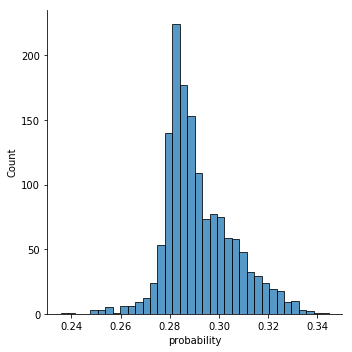

In [33]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE1095']
sns.displot(data =  df_proba_sample_c , x='probability')

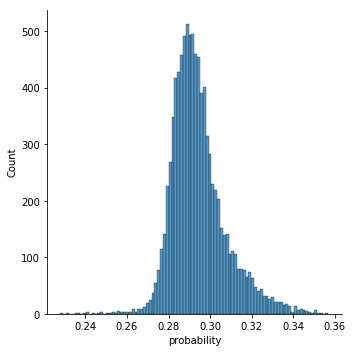

In [34]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE0286']
sns.displot(data =  df_proba_sample_c , x='probability')

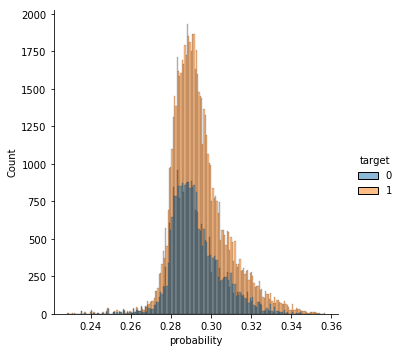

In [35]:
sns.displot(data =  df_proba_sample , x='probability', hue= 'target')

In [36]:
from scipy import stats

In [37]:
df_proba_sample_p_target_0 =  df_proba_sample[df_proba_sample['target'] == 0 ]['probability']
df_proba_sample_p_target_1 =  df_proba_sample[df_proba_sample['target'] == 1 ]['probability']
stats.ttest_ind(df_proba_sample_p_target_0, df_proba_sample_p_target_1 )

Ttest_indResult(statistic=-22.872807884367308, pvalue=1.6461750549092457e-115)

In [46]:
resnet_bs64_training1 = 'BestSortTilesVal_64BS'
list_tiles_resnet_bs64_training1 = []
for s in os.listdir(resnet_bs64_training1):
    for sf in os.listdir(os.path.join(resnet_bs64_training1, s)):
        list_tiles_resnet_bs64_training1 += os.listdir(os.path.join(resnet_bs64_training1, s, sf))

In [47]:
resnet_bs64_training2 = 'BestSortTilesVal_64BS_Training2'
list_tiles_resnet_bs64_training2 = []
for s in os.listdir(resnet_bs64_training2):
    for sf in os.listdir(os.path.join(resnet_bs64_training2, s)):
        list_tiles_resnet_bs64_training2 += os.listdir(os.path.join(resnet_bs64_training2, s, sf))
        

In [55]:
set(list_tiles_resnet_bs64_training1).intersection(set(list_tiles_resnet_bs64_training2))

set()

['TNE0985_33265_13861__34.jpg',
 'TNE0985_14323_16171__34.jpg',
 'TNE0985_30493_14785__34.jpg',
 'TNE0985_25873_18019__34.jpg',
 'TNE0985_15247_15247__34.jpg',
 'TNE0985_12013_7393__24.jpg',
 'TNE0985_6469_1849__24.jpg',
 'TNE0985_31879_26335__24.jpg',
 'TNE0985_33265_7393__24.jpg',
 'TNE0985_36499_18943__24.jpg',
 'TNE0519_23101_95173__34.jpg',
 'TNE0519_46201_100255__34.jpg',
 'TNE0519_37423_95635__34.jpg',
 'TNE0519_35575_48511__34.jpg',
 'TNE0519_35113_84085__34.jpg',
 'TNE0519_17095_82699__24.jpg',
 'TNE0519_54979_66067__24.jpg',
 'TNE0519_23563_93787__24.jpg',
 'TNE0519_42043_57289__24.jpg',
 'TNE0519_37885_99793__24.jpg',
 'TNE1422_25873_30493__34.jpg',
 'TNE1422_37885_52669__34.jpg',
 'TNE1422_41581_33265__34.jpg',
 'TNE1422_26797_40657__34.jpg',
 'TNE1422_21253_28645__34.jpg',
 'TNE1422_53593_42505__24.jpg',
 'TNE1422_45277_53593__24.jpg',
 'TNE1422_56365_36961__24.jpg',
 'TNE1422_54517_40657__25.jpg',
 'TNE1422_24949_57289__25.jpg',
 'TNE0287_39271_68377__36.jpg',
 'TNE0287_3

In [3]:
s = [0,4,6,8]
s += list(range(10,110,10))

In [10]:
import pandas as pd

for i in s:
    df_ = pd.read_csv('ResRNNFrom64BS_S50/convergence_{}.csv'.format(i))
    s_l = [i] * df_.shape[0]
    df_['s'] = s_l
    if i == 0:
        main_df_rnn = df_
    else:
        main_df_rnn = main_df_rnn.append(df_)
print(main_df_rnn.head())
        
   

  epoch  train.loss  train.fpr  train.fnr  val.loss  val.fpr  val.fnr    s
0     1    0.675307   0.486772   0.585366  0.734700      0.0      1.0  4.0
1     2    0.598770   0.000000   1.000000  0.830431      0.0      1.0  4.0
2     3    0.681974   0.000000   1.000000  0.804352      0.0      1.0  4.0
3     4    0.615578   0.000000   1.000000  0.716709      0.0      1.0  4.0
4     5    0.623284   0.000000   1.000000  0.753348      0.0      1.0  4.0


Text(0.5, 1.0, 'Train loss by s level')

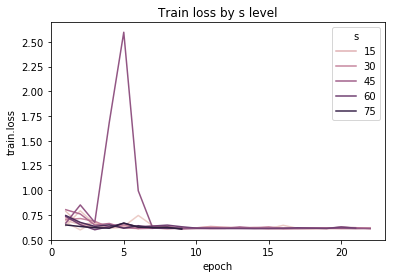

In [12]:
import seaborn as sns
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='train.loss',hue='s')
ax.set_title('Train loss by s level')

Text(0.5, 1.0, 'Train: FPR (blues) and FNR (purples) by s level')

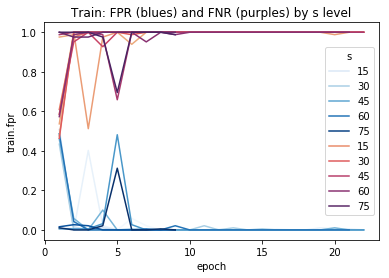

In [18]:
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='train.fpr',hue='s', palette= "Blues")
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='train.fnr',hue='s', palette= "flare")
ax.set_title('Train: FPR (blues) and FNR (purples) by s level')

Text(0.5, 1.0, 'Val loss by s level')

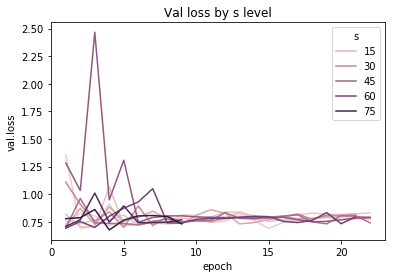

In [19]:
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='val.loss',hue='s')
ax.set_title('Val loss by s level')

Text(0.5, 1.0, 'Val: FPR (blues) and FNR (purples) by s level')

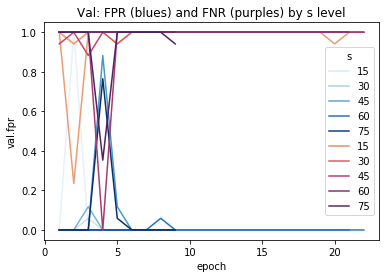

In [20]:
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='val.fpr',hue='s', palette= "Blues")
ax = sns.lineplot(data=main_df_rnn,  x='epoch', y='val.fnr',hue='s', palette= "flare")
ax.set_title('Val: FPR (blues) and FNR (purples) by s level')